# Required libraries

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from derivative import dxdt
import pandas as pd

# Frailty Index Model

# $\frac{df}{dt} = a \cdot (1-f)   \cdot (1+bt) - fr(1-st)$


# Mortality Model

# $\mu = \mu_0 f(t)^c$


In [11]:
# Differential equation of the frailty index
def frailty_index_differential_equation(f, t, a, b, r, s):
    dfdt = a * (1 - f) * (1 + b * t) - f * r * (1 - s * t)
    return dfdt

# Time points
t = np.linspace(0, 100, 200)  # 100 time steps from 0 to 10

# Default initial conditions and parameters
f0 = 0.1
a = 0.01
b = 0.09
r = 0.86
s = 0.01

# Function for the plots with new parameters values
def update_plot(a, b, r, s, initial_condition):
    f_solution = odeint(frailty_index_differential_equation, initial_condition, t, args=(a, b, r, s)) #Solution of the differential equation using Odeint

    valor_damage_rate = a*(1+b*t) #Damage rate function
    valor_repair_rate = r*(1-s*t) #Repair rate function

    c = 2.87 #Parameter value of the exponent in the power law mortality model
    frailty_index = []
    for i in f_solution:
        frailty_index.append(i[0])
    frailty_index = np.array(frailty_index)
    gompertz_law_differential_equation = frailty_index**c #Gompertz law data using power law mortality model

    file_path = 'Frailty_Phen.csv' #Observational data for the Frailty Index in the paper: DOI 10.1007/s10522-017-9684-x
    data = pd.read_csv(file_path)

    x_values = data['X'] #Age of the observational data
    y_values = data['Y'] #Frailty index of the observational data

    #_________________________________________________________________________________
    #Calculation for instantaneous values of alpha and Ro with the Gompertz law

    edad_40_60 = t[40:60]
    data_40_60 = gompertz_law_differential_equation[40:60]
    derivative_process = dxdt(data_40_60, edad_40_60, kind="finite_difference", k=1)
    beta_values_40_60 = derivative_process/data_40_60
    R_values_40_60 = data_40_60/np.e**(beta_values_40_60*edad_40_60)

    edad_60_80 = t[60:80]
    data_60_80 = gompertz_law_differential_equation[60:80]
    derivative_process = dxdt(data_60_80, edad_60_80, kind="finite_difference", k=1)
    beta_values_60_80 = derivative_process/data_60_80
    R_values_60_80 = data_60_80/np.e**(beta_values_60_80*edad_60_80)

    #_________________________________________________________________________________

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    
    ax1.plot(t, f_solution, label='Frailty Index')
    ax1.scatter(x_values, y_values, color = "red")
    ax1.set_xlabel(r'Time')
    ax1.set_ylabel(r'Frailty Index')
    ax1.set_title(r'Frailty Index')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(t, valor_damage_rate, color = "blue", label = "Damage Rate")
    ax2.plot(t, valor_repair_rate, color = "red", label = "Repair Rate")
    ax2.set_xlabel(r'Time')
    ax2.set_ylabel(r'Rates values')
    ax2.set_title(r'Damage and Repair rates vs time')
    ax2.legend()
    ax2.grid(True)

    ax3.plot(t, gompertz_law_differential_equation, color = "green")
    ax3.set_xlabel(r'Time')
    ax3.set_ylabel(r'Gompertz Law')
    ax3.set_title(r'Mortality Rate vs time')
    ax3.legend()
    ax3.set_yscale("log")
    ax3.grid(True)

    ax4.scatter(beta_values_40_60, R_values_40_60, color = "red" ,label = "Ages Window: 40-60")
    ax4.scatter(beta_values_60_80, R_values_60_80, color= "blue", marker='*' ,label = "Ages Window: 60-80")
    ax4.set_title("SM Correlation with Model", fontsize = 16)
    ax4.set_xlabel(r"$\alpha$ parameter", fontsize = 14)
    ax4.set_ylabel(r"$Ln(R_0)$ parameter", fontsize = 14)
    ax4.set_yscale("log")
    ax4.legend()
    ax4.grid(True)

    #plt.savefig("Frailty_Rates_Mortality.jpg", dpi = 1000)

    fig.tight_layout()

# Sliders for interactive parameter adjustment
slider_a = widgets.FloatSlider(value=a, min=0.0, max=1.0, step=0.001, description='a:')
slider_b = widgets.FloatSlider(value=b, min=0, max=2, step=0.001, description='b:')
slider_r = widgets.FloatSlider(value=r, min=0, max=1, step=0.001, description='r:')
slider_s = widgets.FloatSlider(value=s, min=0, max=0.01, step=0.001, description='s:')
slider_initial_condition = widgets.FloatSlider(value=f0, min=0, max=1, step=0.1, description='Initial Condition:')

# Function to be called when sliders are changed
def on_value_change(change):
    a = slider_a.value
    b = slider_b.value
    r = slider_r.value
    s = slider_s.value
    initial_condition = slider_initial_condition.value
    update_plot(a, b, r, s, initial_condition)

# Function to the slider value change event
slider_a.observe(on_value_change, names='value')
slider_b.observe(on_value_change, names='value')
slider_r.observe(on_value_change, names='value')
slider_s.observe(on_value_change, names='value')
slider_initial_condition.observe(on_value_change, names='value')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


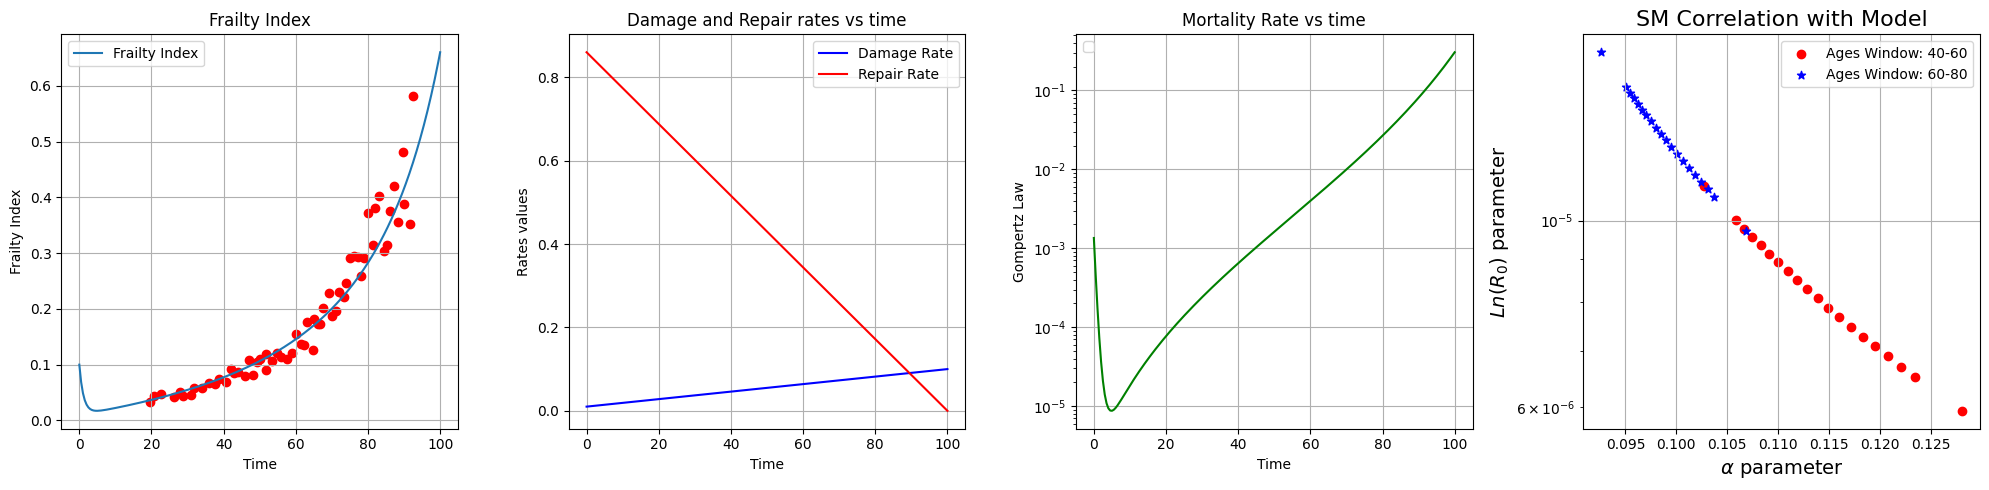

In [12]:
# Display the interactive plot and sliders
display(widgets.VBox([slider_a, slider_b, slider_r, slider_s, slider_initial_condition]))

update_plot(a, b, r, s, f0)  # Display the initial plot